<a href="https://colab.research.google.com/github/Shahid0120/ml-mini-projects/blob/main/SVM_iris_data_linear_two_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Iris dataset
18th December 2023

Goals : Classify a Plants whether it is Iris-Setosa or
Iris-Versicolour

Start of with 2D features where x1 = sepal lenght annd x2 = sepal width
then we create a class which will find the optimal margin classifier (linear hopefully) if not linearly seperable then we use kernal.

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
iris = load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So all features have the same amount of data

In [5]:
# removing all Iris-Virginica using dummy variable

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Remove data points that are Iris-Virginica in place
iris_df = iris_df[iris_df['target'] != 2]

print(iris_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    target  
0        0  
1        0  


In [6]:
# randomly shuffle data
import numpy as np
import pandas as pd
import random

random.seed(42)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size_data = int(len(data) * test_ratio)
    train_size_data = int(len(data) * (1 - test_ratio))
    test_indices = shuffled_indices[:test_size_data]
    train_indices = shuffled_indices[test_size_data:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(iris_df, 0.2)

In [7]:
print(len(train_set))
print(len(test_set))

80
20


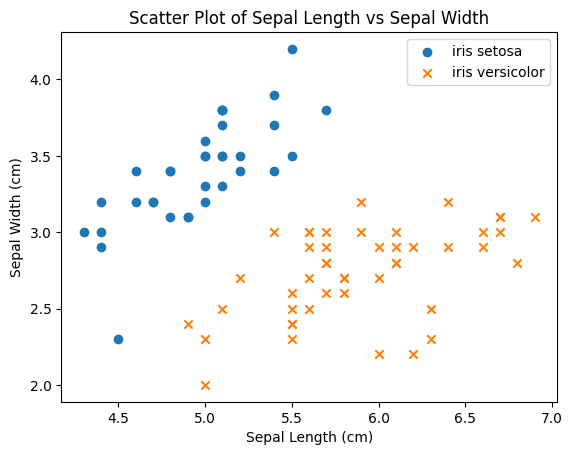

In [8]:
# plot x1 = sepal lenght annd x2 = sepal width for 'setosa' 'versicolor'
import matplotlib.pyplot as plt

# seperating
iris_setosa = train_set[train_set['target'] == 0]
iris_versicolor = train_set[train_set['target'] == 1]

plt.scatter(iris_setosa['sepal length (cm)'], iris_setosa['sepal width (cm)'], label='iris setosa', marker='o')
plt.scatter(iris_versicolor['sepal length (cm)'], iris_versicolor['sepal width (cm)'], label='iris versicolor', marker='x')

# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend()

# Show the plot
plt.show()

Cleary this is linearly sperable using an optimal margin classifier. But there is a one point in the iris setosa that heavily influcer the optimal margin classifier

In [42]:
# creating the optimal margin classifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train = train_set[['sepal length (cm)', 'sepal width (cm)']]
y_train = train_set['target']

X_test = test_set[['sepal length (cm)', 'sepal width (cm)']]
y_test = test_set[['target']]

svm_classifier = SVC(kernel='linear', C=0.09)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print(y_pred)

accuracy = accuracy_score(y_pred, y_test)

print(f"The accuracy score of model is {accuracy: f}")




[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
The accuracy score of model is  1.000000


So the accuracy score of the linear SVM was 100% it was able to classify plants based on class interm of sepal length and sepal width

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


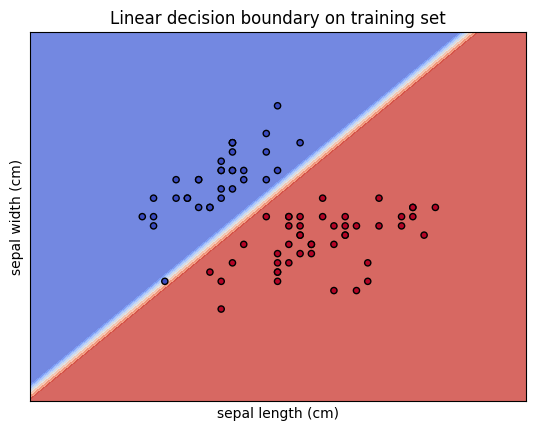

In [43]:
# plotting SVC
def make_meshgrid(x,y, h=0.20):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  x_axis = np.arange(x_min, x_max, h)
  y_axis = np.arange(y_min, y_max, h)
  xx, yy = np.meshgrid(x_axis, y_axis)
  return xx, yy

def plot_deicsion_boundary(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out


fig, ax = plt.subplots()
X0, X1 = train_set['sepal length (cm)'].values, train_set['sepal width (cm)'].values
xx, yy = make_meshgrid(X0, X1)

plot_deicsion_boundary(ax, svm_classifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal width (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Linear decision boundary on training set")
plt.show()


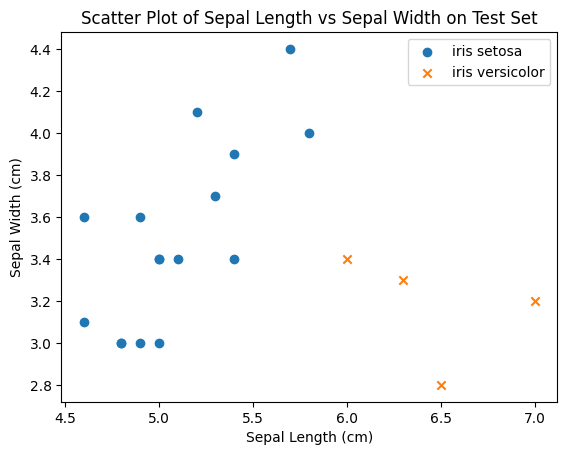

In [37]:
# Evaluating Model using test set
# Visualise 2D model
X_test = test_set[['sepal length (cm)', 'sepal width (cm)']]
y_test = test_set[['target']]

iris_setosa = (y_test['target'] == 0)
iris_versicolor = (y_test['target'] == 1)

plt.scatter(X_test[iris_setosa]['sepal length (cm)'], X_test[iris_setosa]['sepal width (cm)'],
            label='iris setosa', marker='o')
plt.scatter(X_test[iris_versicolor]['sepal length (cm)'], X_test[iris_versicolor]['sepal width (cm)'],
            label='iris versicolor', marker='x')

# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width on Test Set')
plt.legend()

# Show the plot
plt.show()
